In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# min_df默认为1，忽略出现词频小于1的词==不忽略任何词
# stop_words = 'english' 即忽略英语中高频但是没意义的词如“a、most、about“等
vectorizer = CountVectorizer(min_df=1,stop_words='english')  


In [49]:
content = ["what the fuck","what is the hard disk"]
x = vectorizer.fit_transform(content)
x.toarray().transpose()

array([[0, 1],
       [1, 0],
       [0, 1]], dtype=int64)

In [50]:
vectorizer.get_feature_names()

['disk', 'fuck', 'hard']

In [51]:
from pathlib import Path
TOY_DIR = Path(r'building machine learning systems with python/data/toy')
TOY_DIR.is_dir()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

True

In [52]:
posts = []
for fn in TOY_DIR.iterdir():
    with open(fn, 'r') as f:
        posts.append(f.read())

In [53]:
x_train = vectorizer.fit_transform(posts)
x_train.shape

(5, 18)

In [54]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print(new_post_vec.toarray())

[[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [55]:
import scipy as sp

In [56]:
def dis_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())


def best_post(X, new_vec, dis_func):
    best_doc = None
    best_dis = float('inf')
    best_i = None
    for i,post in enumerate(posts):
        if post == new_post:
            continue
        post_vec = X.getrow(i)
        d = dis_func(post_vec, new_vec)
        print("I:",i ,"POST:" ,post)
        print("d:",d)
        if d < best_dis:
            best_doc = post
            best_i = i
    print("BEST I:",best_i ,"BEST POST:" ,best_doc)
    print("best d:",d)

In [57]:
best_post(x_train, new_post_vec, dis_raw)

I: 0 POST: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
d: 3.1622776601683795
I: 1 POST: Imaging databases provide storage capabilities.
d: 1.7320508075688772
I: 2 POST: Most imaging databases save images permanently.

d: 1.7320508075688772
I: 3 POST: Imaging databases store data.
d: 1.4142135623730951
I: 4 POST: Imaging databases store data. Imaging databases store data. Imaging databases store data.
d: 5.0990195135927845
BEST I: 4 BEST POST: Imaging databases store data. Imaging databases store data. Imaging databases store data.
best d: 5.0990195135927845


In [58]:
# 先泛化后在求距离
def dis_norm(v1, v2):
    v1_norm = v1/sp.linalg.norm(v1.toarray())
    v2_norm = v2/sp.linalg.norm(v2.toarray())
    delta = v1_norm - v2_norm
    return sp.linalg.norm(delta.toarray())

In [59]:
best_post(x_train, new_post_vec, dis_norm)

I: 0 POST: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
d: 1.414213562373095
I: 1 POST: Imaging databases provide storage capabilities.
d: 0.8573732768944039
I: 2 POST: Most imaging databases save images permanently.

d: 0.8573732768944039
I: 3 POST: Imaging databases store data.
d: 0.7653668647301795
I: 4 POST: Imaging databases store data. Imaging databases store data. Imaging databases store data.
d: 0.7653668647301795
BEST I: 4 BEST POST: Imaging databases store data. Imaging databases store data. Imaging databases store data.
best d: 0.7653668647301795


In [63]:
# 将相同词干的词划分为同一个词统计
# import nltk


#k-means示例开始，以20newsgroup数据集为例

In [64]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
all_data = datasets.fetch_20newsgroups(subset='all')

In [65]:
# 简单起见，只用部分新闻组，用categories指定
groups = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
'comp.windows.x', 'sci.space']
train_data = datasets.fetch_20newsgroups(subset='train', categories=groups)
test_data = datasets.fetch_20newsgroups(subset='test', categories=groups)

In [66]:
print(len(test_data.filenames))
print(len(train_data.filenames))

2349
3529


In [67]:
# 忽略不合法字符  decode_error='ignore'
vectorizer_km = TfidfVectorizer(min_df=10, max_df=.5, stop_words='english', decode_error='ignore')
vectorized = vectorizer_km.fit_transform(train_data.data)

In [138]:
k = 50
from sklearn.cluster import KMeans
# verbose 打印出训练的信息
km = KMeans(n_clusters=k, init='k-means++', n_init=1, verbose=5)
km.fit(vectorized)

Initialization complete


Iteration  0, inertia 5760.689


Iteration  1, inertia 3202.590
Iteration  2, inertia 3173.634


Iteration  3, inertia 3156.976


Iteration  4, inertia 3148.279


Iteration  5, inertia 3141.980


Iteration  6, inertia 3137.486


Iteration  7, inertia 3134.915


Iteration  8, inertia 3133.108


Iteration  9, inertia 3131.924


Iteration 10, inertia 3130.693


Iteration 11, inertia 3129.004


Iteration 12, inertia 3127.951


Iteration 13, inertia 3127.675


Iteration 14, inertia 3127.464


Iteration 15, inertia 3127.314


Iteration 16, inertia 3127.246


Iteration 17, inertia 3127.231
Converged at iteration 17: center shift 0.000000e+00 within tolerance 1.731605e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=5)

In [131]:
# 用训练的模型开始预测
new_post_km = '''
Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
'''
new_post_km_vec = vectorizer_km.transform([new_post_km])
new_post_label = km.predict(new_post_km_vec)[0]

In [132]:
# 找到训练集中与new_post_km属于同一簇的索引
# nonzero返回非0的索引
similar_indices = (km.labels_ == new_post_label).nonzero()[0]

In [133]:
print("查看索引：")
print(list(similar_indices))
print("维度相同：")
print(vectorized[0].shape)
print(new_post_km_vec.shape)

查看索引：
[71, 167, 201, 228, 359, 377, 463, 676, 807, 808, 917, 939, 976, 1076, 1114, 1377, 1486, 1726, 1752, 1985, 1986, 2447, 2499, 2512, 2516, 2600, 2800, 3202, 3285, 3296, 3437, 3458]
维度相同：
(1, 5651)
(1, 5651)


In [134]:
similar = []    # 相似文章
for i in similar_indices:
    dis = sp.linalg.norm((new_post_km_vec - vectorized[i]).toarray())
    similar.append((dis, train_data.data[i]))
sorted(similar)

[(1.0807851743953758,
  "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel                                      

In [135]:
print(similar[-1])

(1.240525206354146, 'From: rtfuhge@immd8.informatik.uni-erlangen.de (Robert Fuhge)\nSubject: Re: Booting from B drive\nOrganization: University of Erlangen, csd. AI\nNNTP-Posting-Host: faui8s3.informatik.uni-erlangen.de\nLines: 36\n\nHi!\n\nI think VGA-Copy can do what you need. \nIf you create a new floppy for your a: drive (that is the 5 1/4"), turn on\nthe "modify" switch of vga-copy.\nWhen you boot using this diskette, a message appears:\n\nThis is no system disk, you can\n1) replace disk with another,\n2) boot from Harddisk or\n3) switch drives and reboot (that is, a: becomes b:, b: becomes a:)\nType your choice:\n\nWhen you select the third item, you can boot from b: which is now called a: .\nSeems to work very good, for example booting drdos6 from the installation disks\nin 3.5" format was no problem for a friend of mine (I have only a 3.5" a: drive)\n\nHope that helps\nRobert\n\nP.S.: VGA-Copy is shareware, so it\'s easy to get. Newest Version seems to be 5.0 .\n\n-- \n+-------

In [140]:
test = vectorizer_km.transform(test_data.data)
km.score(test)

-2177.7630551137727

#k-means示例

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets.samples_generator import make_blobs

In [179]:
x, y = make_blobs(n_samples=300, centers=4,cluster_std=0.6, random_state=0)

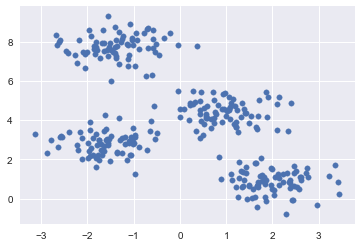

In [180]:
plt.scatter(x[:,0], x[:,1], s=30)
plt.show()

In [181]:
cluster_num = 4
km1 = KMeans(n_clusters=cluster_num)
km1.fit(x)
y_predict = km1.predict(x)
print(y_predict)

[0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


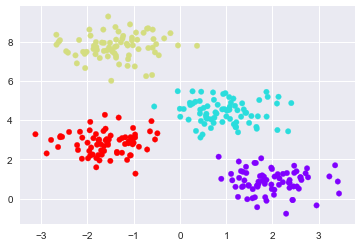

In [183]:
plt.scatter(x[:,0], x[:,1], c=y_predict, s=30, cmap='rainbow')
plt.show()